In [29]:
import sqlalchemy as sa
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Connecting to SQL

In [12]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER=SIMONLAPTOP;DATABASE=portfolio_db;')

In [69]:
spy = pd.read_sql("SELECT * FROM SPY_ETF_data", cnxn)


C:\Users\sxie0\AppData\Local\Temp\ipykernel_19972\1066086395.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  spy = pd.read_sql("SELECT * FROM SPY_ETF_data", cnxn)


Fetching data from SQL server

In [18]:
p_aggs = pd.read_sql("SELECT * FROM portfolio_aggregations", cnxn)
spy = pd.read_sql("SELECT * FROM SPY_ETF_data", cnxn)
amzn = pd.read_sql("SELECT * FROM AMZN_stock_data", cnxn)
axp = pd.read_sql("SELECT * FROM AXP_stock_data", cnxn)
celh = pd.read_sql("SELECT * FROM CELH_stock_data", cnxn)
nvda = pd.read_sql("SELECT * FROM NVDA_stock_data", cnxn)
ndx = pd.read_sql("SELECT * FROM NDX_data", cnxn)
tsm = pd.read_sql("SELECT * FROM TSM_stock_data", cnxn)
usdjpy = pd.read_sql("SELECT * FROM USDJPY_FOREX_data", cnxn)
tickers = pd.read_sql("SELECT * FROM portfolio_tickers", cnxn)


C:\Users\sxie0\AppData\Local\Temp\ipykernel_19972\84115720.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  p_aggs = pd.read_sql("SELECT * FROM portfolio_aggregations", cnxn)
C:\Users\sxie0\AppData\Local\Temp\ipykernel_19972\84115720.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  spy = pd.read_sql("SELECT * FROM SPY_ETF_data", cnxn)
C:\Users\sxie0\AppData\Local\Temp\ipykernel_19972\84115720.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  amzn = pd.read_sql("SELECT * FROM AMZN_stock_data", cnxn)
C:\Users\sxie0\Ap

## Visualizations

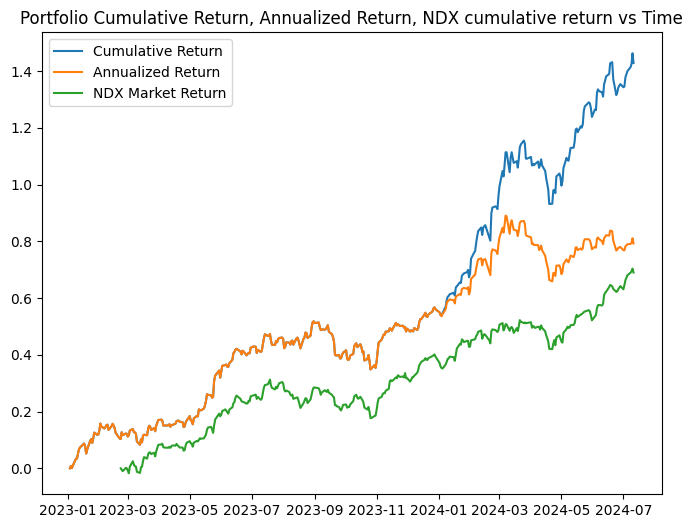

In [87]:
# Cumulative and Annualized Returns on Portfolio

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)

plt.plot(p_aggs['date'], p_aggs['cumulative return'], label="Cumulative Return")
plt.plot(p_aggs['date'], p_aggs['annualized return'], label="Annualized Return")
plt.plot(ndx['date'], ndx['return'], label="NDX Market Return")

plt.title('Portfolio Cumulative Return, Annualized Return, NDX cumulative return vs Time')
plt.legend(loc='upper left')

plt.show()

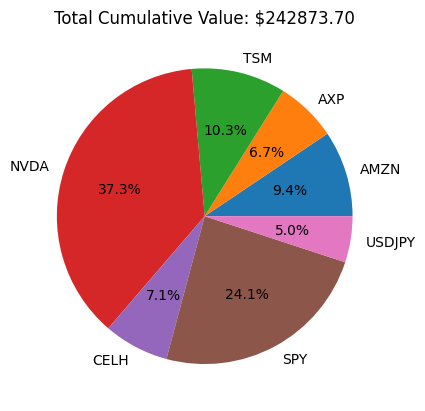

In [103]:
# Total  of Portfolio

plt.pie(
    [amzn['value'].iat[-1], axp['value'].iat[-1], tsm['value'].iat[-1], nvda['value'].iat[-1], celh['value'].iat[-1],spy['value'].iat[-1],usdjpy['value'].iat[-1]],
    labels=['AMZN', 'AXP', 'TSM', 'NVDA', 'CELH', 'SPY', 'USDJPY'],
    autopct='%1.1f%%'
    )
plt.title("Total Cumulative Value: ${:.2f}".format(p_aggs['value'].iat[-1]))
plt.show()

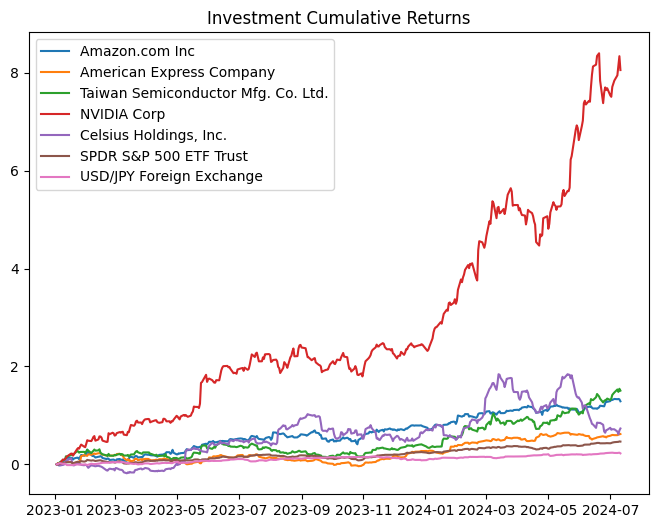

In [139]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)

plt.plot(amzn['date'], amzn['cumulative return'], label=tickers.loc[tickers['ticker']=='AMZN']['name'])
plt.plot(axp['date'], axp['cumulative return'], label=tickers.loc[tickers['ticker']=='AXP']['name'])
plt.plot(tsm['date'], tsm['cumulative return'], label=tickers.loc[tickers['ticker']=='TSM']['name'])
plt.plot(nvda['date'], nvda['cumulative return'], label=tickers.loc[tickers['ticker']=='NVDA']['name'])
plt.plot(celh['date'], celh['cumulative return'], label=tickers.loc[tickers['ticker']=='CELH']['name'])
plt.plot(spy['date'], spy['cumulative return'], label=tickers.loc[tickers['ticker']=='SPY']['name'])
plt.plot(usdjpy['date'], usdjpy['cumulative return'], label=tickers.loc[tickers['ticker']=='C:USDJPY']['name'])

plt.title('Investment Cumulative Returns')
plt.legend(loc='upper left')


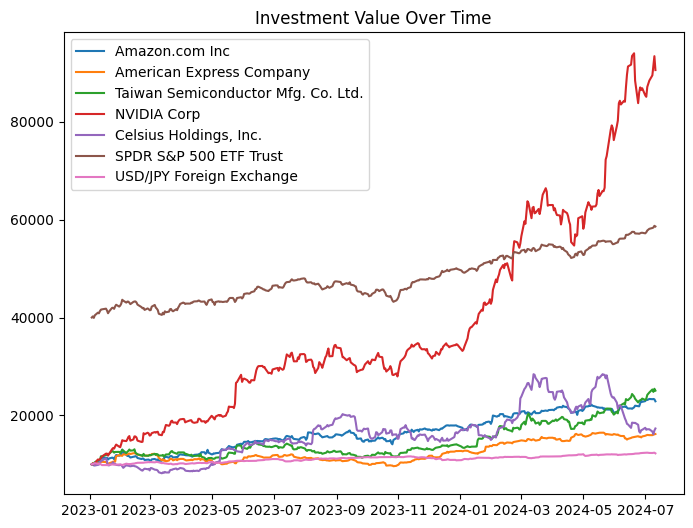

In [138]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)

plt.plot(amzn['date'], amzn['value'], label=tickers.loc[tickers['ticker']=='AMZN']['name'])
plt.plot(axp['date'], axp['value'], label=tickers.loc[tickers['ticker']=='AXP']['name'])
plt.plot(tsm['date'], tsm['value'], label=tickers.loc[tickers['ticker']=='TSM']['name'])
plt.plot(nvda['date'], nvda['value'], label=tickers.loc[tickers['ticker']=='NVDA']['name'])
plt.plot(celh['date'], celh['value'], label=tickers.loc[tickers['ticker']=='CELH']['name'])
plt.plot(spy['date'], spy['value'], label=tickers.loc[tickers['ticker']=='SPY']['name'])
plt.plot(usdjpy['date'], usdjpy['value'], label=tickers.loc[tickers['ticker']=='C:USDJPY']['name'])

plt.title('Investment Value Over Time')
plt.legend(loc='upper left')

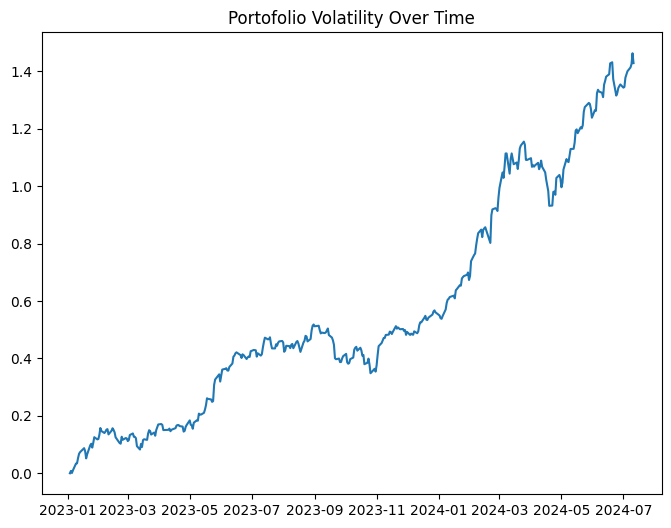

In [106]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)

plt.plot(p_aggs['date'], p_aggs['volatility'])
plt.title("Portofolio Volatility Over Time")
plt.show()

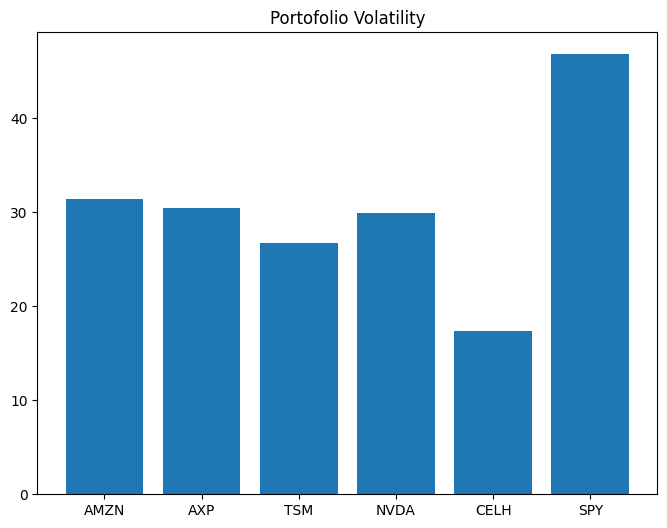

In [112]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)

plt.bar(x = ['AMZN', 'AXP', 'TSM', 'NVDA', 'CELH', 'SPY'],
    height=[amzn['volatility'].iat[-1], axp['volatility'].iat[-1], tsm['volatility'].iat[-1], nvda['volatility'].iat[-1], celh['volatility'].iat[-1],spy['volatility'].iat[-1]])
plt.title("Portofolio Volatility")
plt.show()

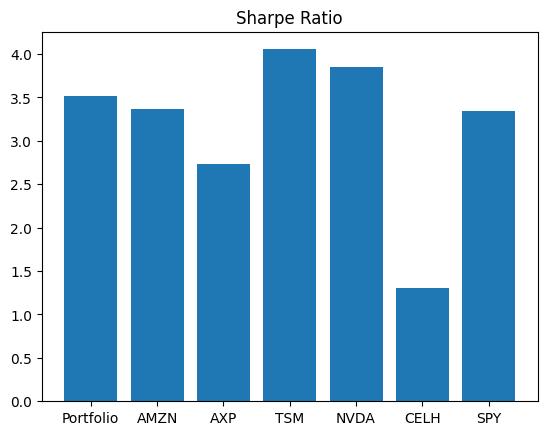

In [135]:
plt.bar(x = ['Portfolio', 'AMZN', 'AXP', 'TSM', 'NVDA', 'CELH', 'SPY'],
    height=[p_aggs['sharpe'].iat[-1], amzn['sharpe'].iat[-1], axp['sharpe'].iat[-1], tsm['sharpe'].iat[-1], nvda['sharpe'].iat[-1], celh['sharpe'].iat[-1],spy['sharpe'].iat[-1]])
plt.title('Sharpe Ratio')
plt.show()

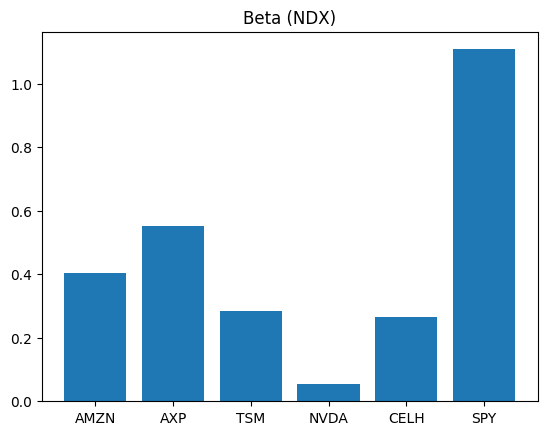

In [137]:
plt.bar(x = ['AMZN', 'AXP', 'TSM', 'NVDA', 'CELH', 'SPY'],
    height=[amzn['beta'].iat[-1], axp['beta'].iat[-1], tsm['beta'].iat[-1], nvda['beta'].iat[-1], celh['beta'].iat[-1],spy['beta'].iat[-1]])
plt.title('Beta (NDX)')
plt.show()

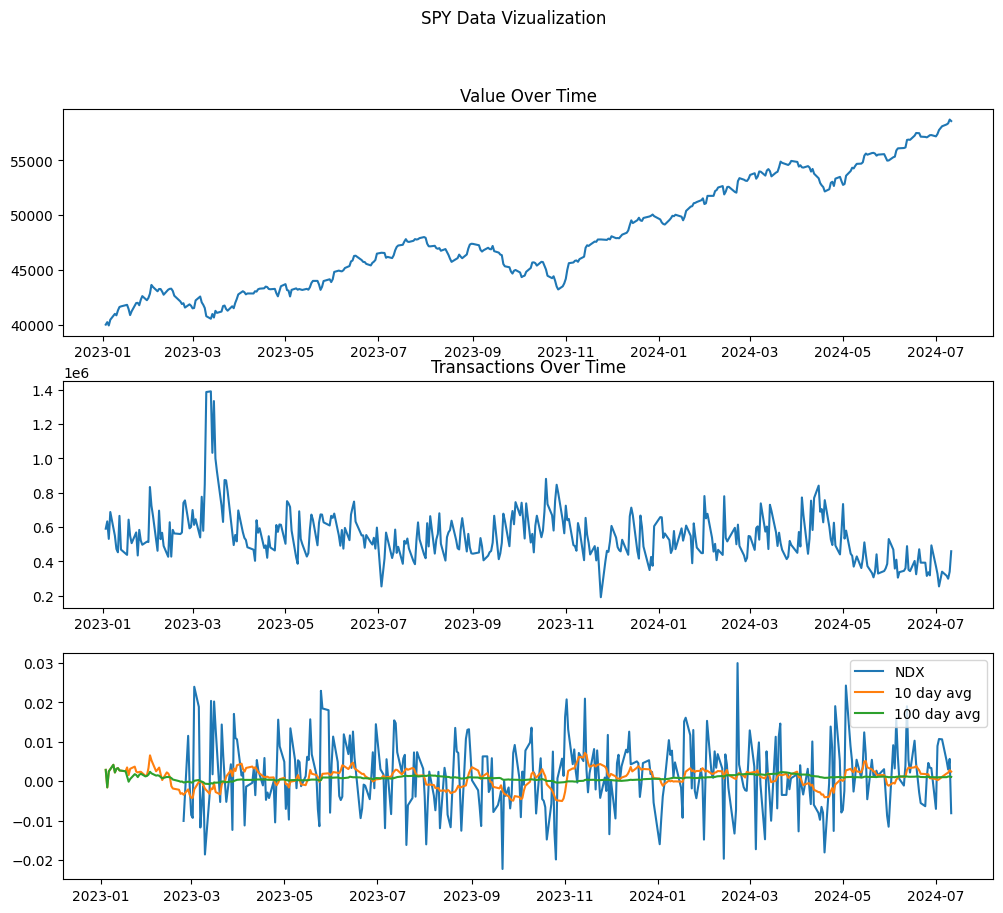

In [202]:
fig, axs = plt.subplots(3,1, figsize=(12,10))

fig.suptitle('SPY Data Vizualization')
axs[0].plot(spy['date'], spy['value'])
axs[0].set_title('Value Over Time')
axs[1].plot(spy['date'], spy['transactions'])
axs[1].set_title('Transactions Over Time')
axs[2].plot(ndx['date'], ndx['average'].pct_change(), label='NDX')
axs[2].plot(spy['date'], spy['10 day avg'].pct_change(), label='10 day avg')
axs[2].plot(spy['date'], spy['100 day avg'].pct_change(), label='100 day avg')
axs[2].legend()

plt.show()

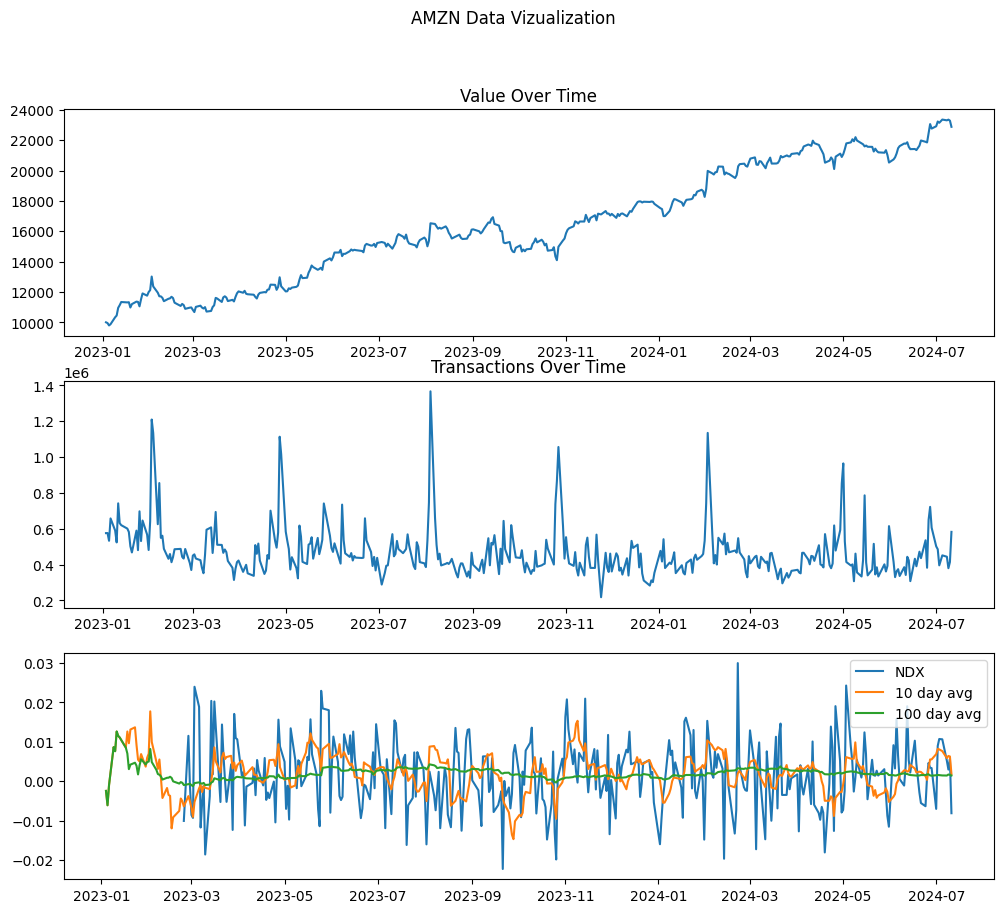

In [201]:
fig, axs = plt.subplots(3,1, figsize=(12,10))

fig.suptitle('AMZN Data Vizualization')
axs[0].plot(amzn['date'], amzn['value'])
axs[0].set_title('Value Over Time')
axs[1].plot(amzn['date'], amzn['transactions'])
axs[1].set_title('Transactions Over Time')
axs[2].plot(ndx['date'], ndx['average'].pct_change(), label='NDX')
axs[2].plot(amzn['date'], amzn['10 day avg'].pct_change(), label='10 day avg')
axs[2].plot(amzn['date'], amzn['100 day avg'].pct_change(), label='100 day avg')
axs[2].legend()

plt.show()

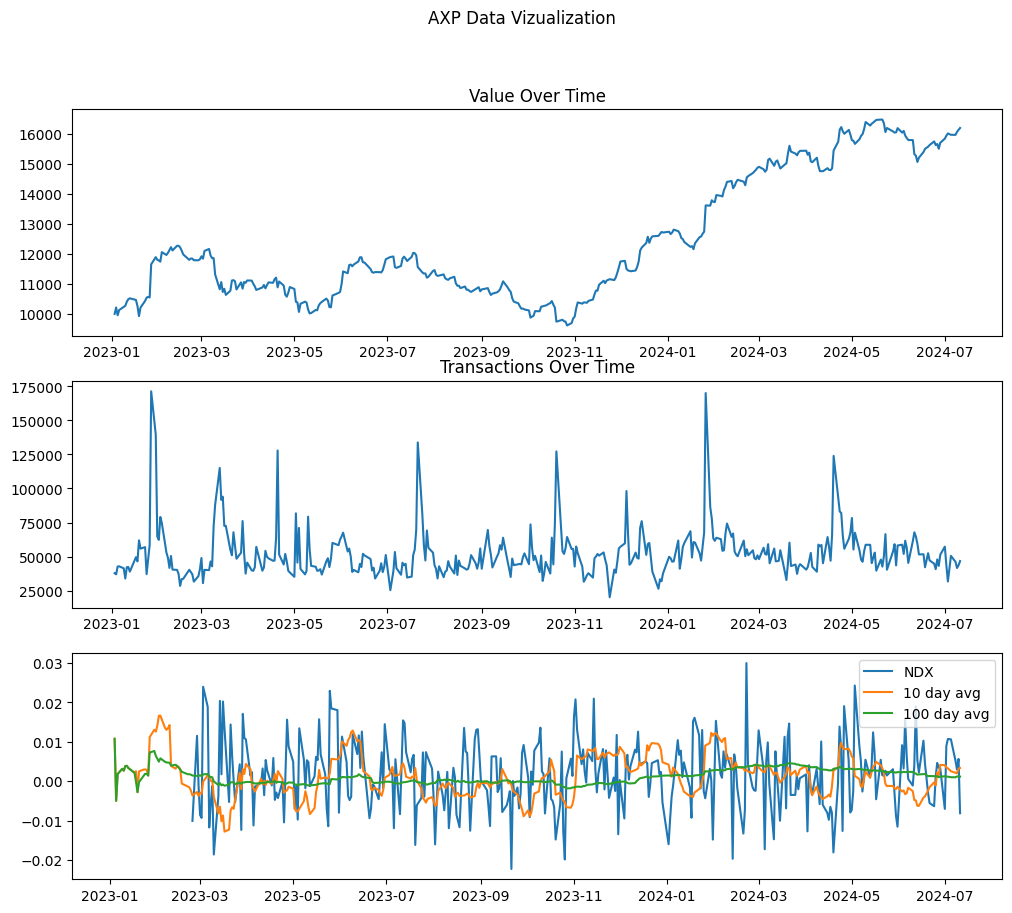

In [203]:
fig, axs = plt.subplots(3,1, figsize=(12,10))

fig.suptitle('AXP Data Vizualization')
axs[0].plot(axp['date'], axp['value'])
axs[0].set_title('Value Over Time')
axs[1].plot(axp['date'], axp['transactions'])
axs[1].set_title('Transactions Over Time')
axs[2].plot(ndx['date'], ndx['average'].pct_change(), label='NDX')
axs[2].plot(axp['date'], axp['10 day avg'].pct_change(), label='10 day avg')
axs[2].plot(axp['date'], axp['100 day avg'].pct_change(), label='100 day avg')
axs[2].legend()

plt.show()

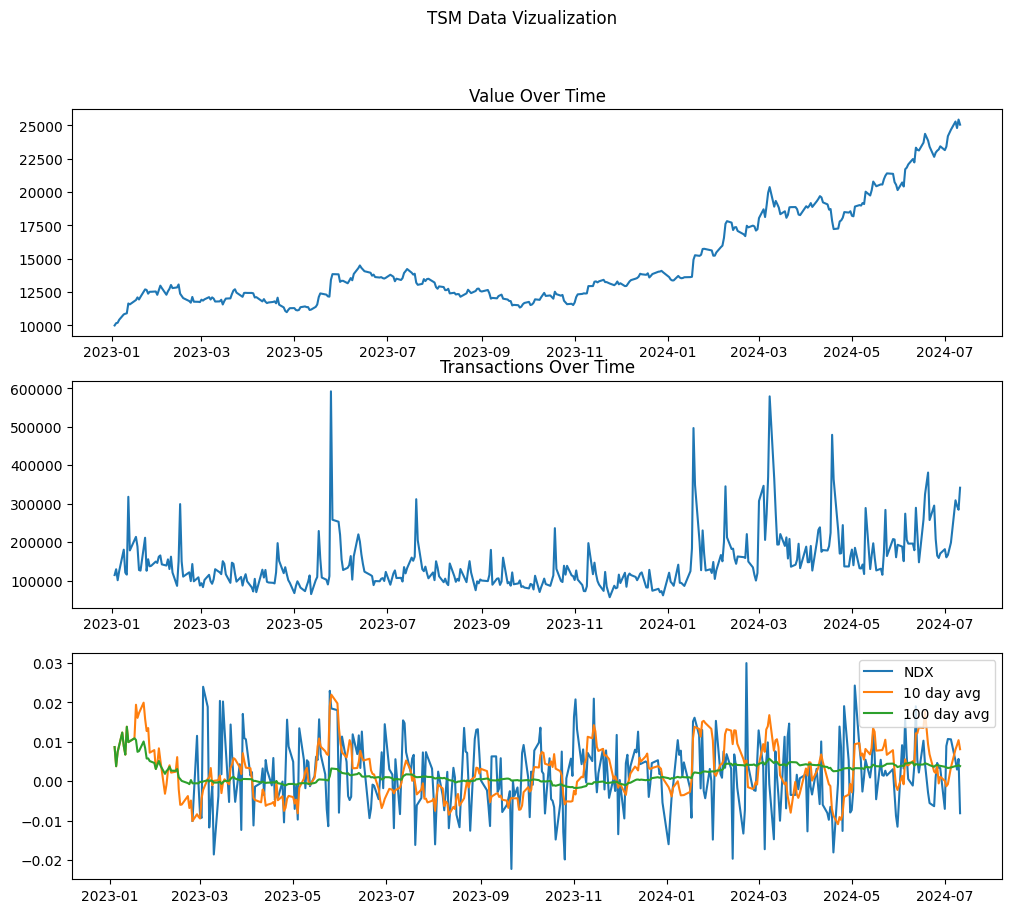

In [204]:
fig, axs = plt.subplots(3,1, figsize=(12,10))

fig.suptitle('TSM Data Vizualization')
axs[0].plot(tsm['date'], tsm['value'])
axs[0].set_title('Value Over Time')
axs[1].plot(tsm['date'], tsm['transactions'])
axs[1].set_title('Transactions Over Time')
axs[2].plot(ndx['date'], ndx['average'].pct_change(), label='NDX')
axs[2].plot(tsm['date'], tsm['10 day avg'].pct_change(), label='10 day avg')
axs[2].plot(tsm['date'], tsm['100 day avg'].pct_change(), label='100 day avg')
axs[2].legend()

plt.show()

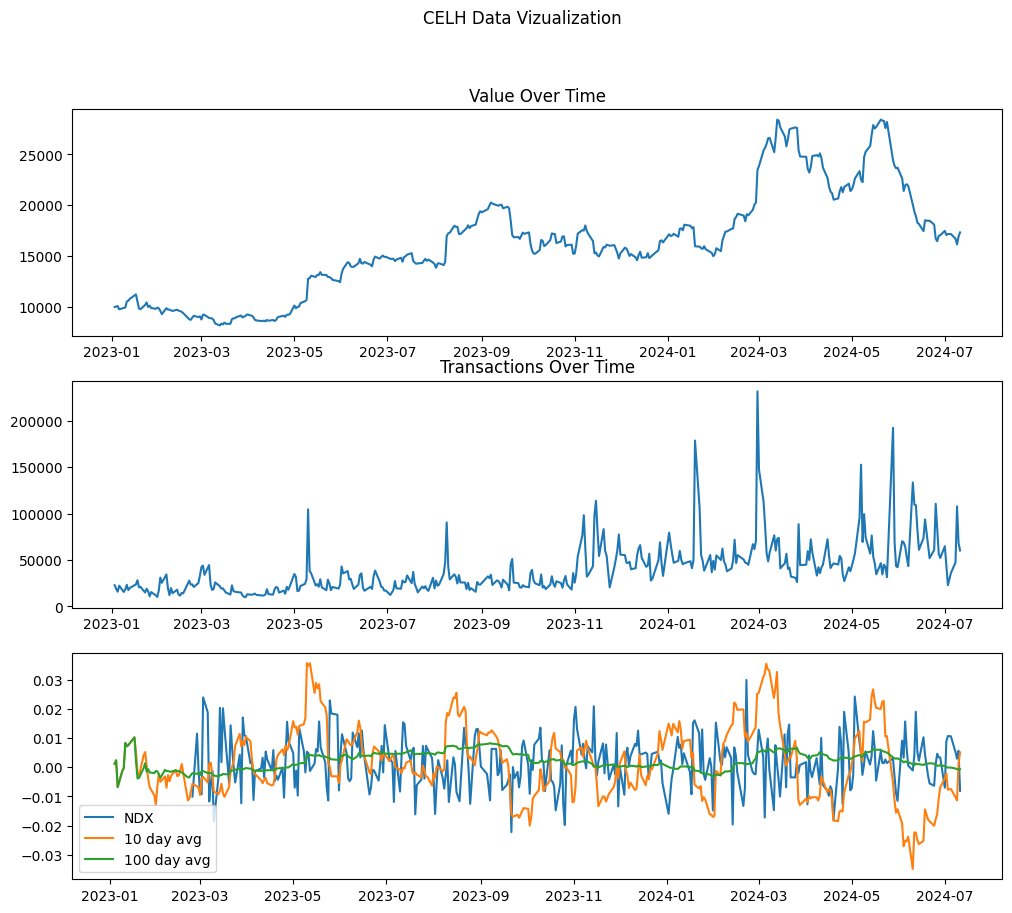

In [193]:
fig, axs = plt.subplots(3,1, figsize=(12,10))

fig.suptitle('CELH Data Vizualization')
axs[0].plot(celh['date'], celh['value'])
axs[0].set_title('Value Over Time')
axs[1].plot(celh['date'], celh['transactions'])
axs[1].set_title('Transactions Over Time')
axs[2].plot(ndx['date'], ndx['average'].pct_change(), label='NDX')
axs[2].plot(celh['date'], celh['10 day avg'].pct_change(), label='10 day avg')
axs[2].plot(celh['date'], celh['100 day avg'].pct_change(), label='100 day avg')
axs[2].legend()

plt.show()

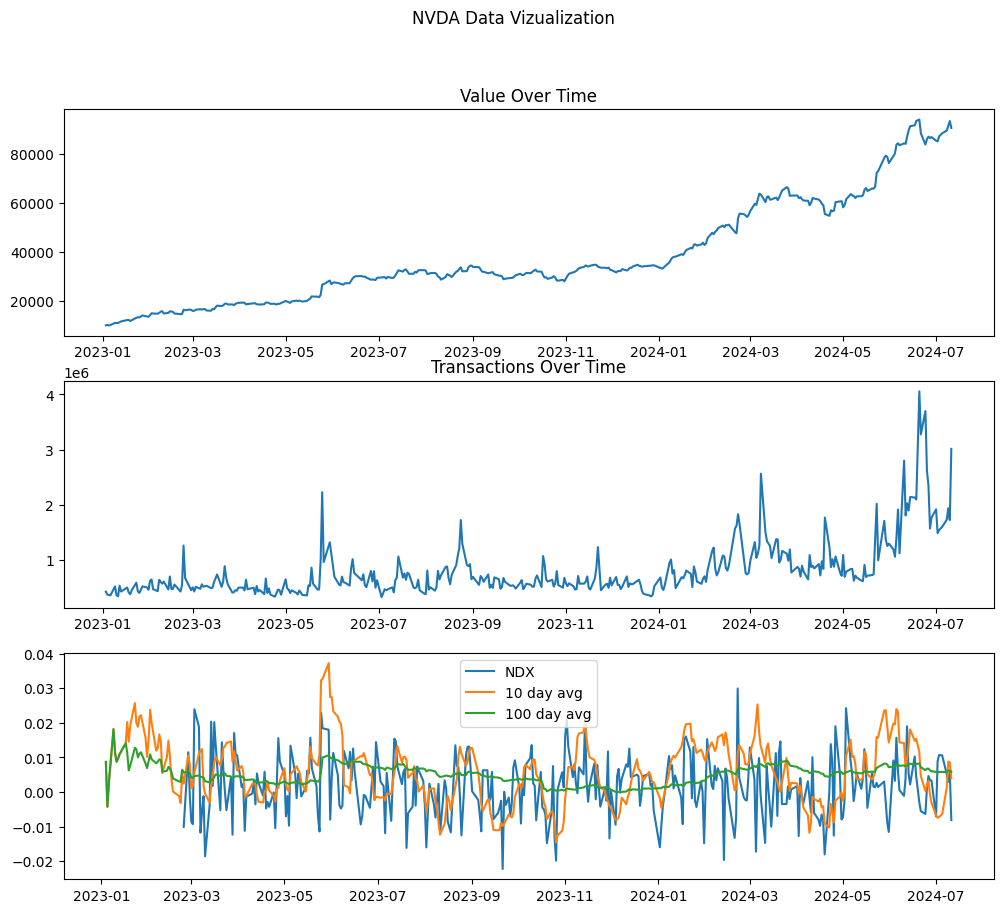

In [195]:
fig, axs = plt.subplots(3,1, figsize=(12,10))

fig.suptitle('NVDA Data Vizualization')
axs[0].plot(nvda['date'], nvda['value'])
axs[0].set_title('Value Over Time')
axs[1].plot(nvda['date'], nvda['transactions'])
axs[1].set_title('Transactions Over Time')
axs[2].plot(ndx['date'], ndx['average'].pct_change(), label='NDX')
axs[2].plot(nvda['date'], nvda['10 day avg'].pct_change(), label='10 day avg')
axs[2].plot(nvda['date'], nvda['100 day avg'].pct_change(), label='100 day avg')
axs[2].legend()

plt.show()

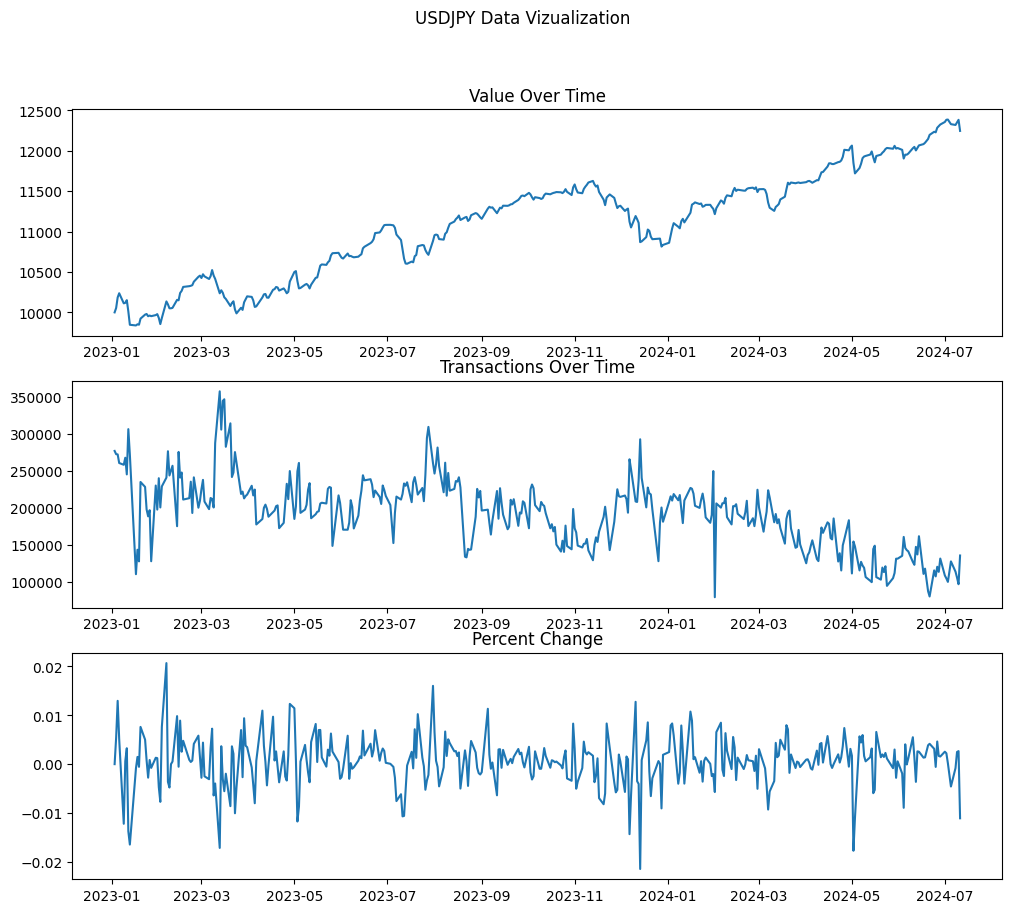

In [200]:
fig, axs = plt.subplots(3,1, figsize=(12,10))

fig.suptitle('USDJPY Data Vizualization')
axs[0].plot(usdjpy['date'], usdjpy['value'])
axs[0].set_title('Value Over Time')
axs[1].plot(usdjpy['date'], usdjpy['transactions'])
axs[1].set_title('Transactions Over Time')
axs[2].plot(usdjpy['date'], usdjpy['percent change'])
axs[2].set_title('Percent Change')
plt.show()

In [213]:
usdjpy.iloc[-1]

date                 2024-07-11 00:00:00
open                              161.58
high                              161.76
low                               157.41
close                             158.28
volume                            135895
vwap                              159.76
transactions                      135895
value                           12244.96
cumulative return               0.224496
percent change                  -0.01108
Name: 381, dtype: object